# <center>Data Preprocessing and Analysis of the Movie Industry Dataset</center>

## Importing the Packages and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df_movies = pd.read_csv('D:/Proyectos/Movie Industry/movies.csv', sep = ',')
df_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Getting familiar with the dataset

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Preprocessing the data

In [4]:
# Before I start altering the data, I will save a copy of the raw dataset as a checkpoint
df_raw = df_movies.copy()

### Working with the "name" column

In [5]:
# First I checked if there were any NaNs, since there are none I can move on to the next column
sum(df_movies['name'].isna())

0

### Working with the "rating" column

In [6]:
sum(df_movies['rating'].isna())

77

In [7]:
# There are 77 NaNs for this column, let's see the different values that this columns has
pd.set_option('display.max_rows', 15)
df_movies['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [8]:
# As I can see, there are several ratings that mean pretty much the same, so I'll replace those values
rating_dict = {'R':'R', 'PG':'PG', 'G':'PG', 'Not Rated': 'Not Rated', 'NC-17': 'R', 'Approved': 'PG', 'TV-PG':'PG',
              'PG-13':'PG-13', 'Unrated': 'Not Rated', 'X':'X', 'TV-MA':'R', 'TV-14':'PG-13'}
df_movies['rating'] = df_movies['rating'].map(rating_dict)
df_movies['rating'].unique()

array(['R', 'PG', nan, 'Not Rated', 'PG-13', 'X'], dtype=object)

In [9]:
# Now that I've eliminated redundating ratings, I'll take care of the NaN, which will be replaced by 'Unrated'
df_movies['rating'].fillna('Not Rated', inplace = True)
df_movies['rating'].unique()

array(['R', 'PG', 'Not Rated', 'PG-13', 'X'], dtype=object)

### Working with the "genre" column

In [10]:
# First we'll check if we have NaN values
sum(df_movies['genre'].isna())

0

In [11]:
# Since we don't have NaNs, let's see the different unique values we have
df_movies['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [12]:
# It looks like 'Music' and 'Musical' are the same, so we'll replace 'Music' with 'Musical'
df_movies['genre'].replace('Music','Musical', inplace = True)
df_movies['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Musical', 'Western', 'Thriller', 'History', 'Mystery', 'Sport'],
      dtype=object)

### Working with the "year" column

In [13]:
# Checking for any missing values
sum(df_movies['year'].isna())

0

In [14]:
# Checking the type of all the values
df_movies['year'].apply(lambda x: type(x)).value_counts()

<class 'int'>    7668
Name: year, dtype: int64

### Working with the "released" column

In [15]:
# Looking for any missing values
sum(df_movies['released'].isna())

2

In [16]:
# Locating the rows with those missing values
df_movies[df_movies['released'].isna() == True]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [17]:
# Since it's only two missing values I googled the information and filled it out instead of the NaNs
df_movies.loc[5728,'released'] = 'October 29, 2010 (United States)'
df_movies.loc[5730,'released'] = 'February 11, 2010 (United States)'

In [18]:
# Making sure I have no missing values
sum(df_movies['released'].isna())

0

In [19]:
# Checking the type of the values for this column
df_movies['released'].head()

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
3     July 2, 1980 (United States)
4    July 25, 1980 (United States)
Name: released, dtype: object

In [20]:
# The values of this column contain both date and country so I'll create another column with the date info only
df_movies['date_of_release'] = df_movies['released'].apply(lambda x: x.split(' (')).apply(lambda x: x[0])
df_movies['date_of_release'].head()

0    June 13, 1980
1     July 2, 1980
2    June 20, 1980
3     July 2, 1980
4    July 25, 1980
Name: date_of_release, dtype: object

In [21]:
# Now I want to check if there are some rows with incomplete information on the date
df_movies[df_movies['date_of_release'].apply(lambda x: x.split(',')).apply(len) == 1][['name','date_of_release']]

,name,date_of_release
78,Babylon,November 1980
201,Longshot,1981
312,Five Days One Summer,1982
329,The Personals,October 1982
376,Nostalghia,March 1992
...,...,...
2816,The White Balloon,1995
4187,Dahmer,2019
5833,Hatchet II,November 2010
5958,The Human Centipede II (Full Sequence),November 2011


In [22]:
# I have 57 rows with either just the year info or the month and year info of the date, I'll fill this info out manually
# First I'll get the index of these 57 rows
keys = df_movies[df_movies['date_of_release'].apply(lambda x: x.split(',')).apply(len) == 1][['name','date_of_release']].index
keys

Int64Index([  78,  201,  312,  329,  376,  439,  449,  463,  467,  719,  731,
             786,  800, 1030, 1035, 1041, 1173, 1212, 1227, 1385, 1395, 1404,
            1415, 1421, 1428, 1438, 1599, 1602, 1621, 1623, 1636, 1680, 1735,
            1753, 1765, 1772, 1797, 1804, 1819, 1820, 1823, 1825, 1841, 1947,
            1951, 1985, 2000, 2029, 2318, 2319, 2427, 2525, 2816, 4187, 5833,
            5958, 6413],
           dtype='int64')

In [23]:
# Second, using the index I previoulsy collected, I'll check the complete list of movies that have the date data incomplete
for i in keys:
    print(df_movies.loc[i,'name'], end = '\t| ')
    print(df_movies.loc[i,'date_of_release'])

Babylon	| November 1980
Longshot	| 1981
Five Days One Summer	| 1982
The Personals	| October 1982
Nostalghia	| March 1992
Heat and Dust	| January 1983
Getting It on	| August 1983
Slayground	| February 1984
My Brother's Wedding	| March 1985
Tampopo	| September 1987
Trouble in Mind	| March 1986
Taipei Story	| 1985
O.C. and Stiggs	| 1985
The Fringe Dwellers	| October 1986
Duet for One	| February 1987
Low Blow	| April 1986
The House on Carroll Street	| 1987
Five Corners	| May 1988
A Man in Love	| September 1987
Drowning by Numbers	| June 1991
Chocolat	| May 1989
Stormy Monday	| May 1988
Pascali's Island	| August 1988
Party Line	| October 1988
Platoon Leader	| October 1988
Salome's Last Dance	| June 1988
Slaves of New York	| March 1989
Scenes from the Class Struggle in Beverly Hills	| July 1989
Monsieur Hire	| June 1990
Too Beautiful for You	| April 1990
Rosalie Goes Shopping	| May 1990
Nikita	| April 1991
The Comfort of Strangers	| April 1991
Life Is Sweet	| December 1991
The Field	| March 

In [24]:
# Third, I'll create a list containing the complete date info for those movies and with that info I'll create a dictionary
# Note: In case of only finding the year, I'll assume the first day and/or month of that year.
dates = ['November 1, 1980', 'January 1, 1981', 'November 12, 1982', 'October 1, 1982', 'March 1, 1992', 'January 1, 1983',
        'August 1, 1983', 'January 27, 1984', 'March 1, 1985', 'May 22, 1987', 'December 11, 1985', 'April 22, 1985', 
         'July 10, 1987', 'October 23, 1986', 'December 25, 1986', 'April 1, 1986', 'March 4, 1988', 'January 22, 1988',
        'May 7, 1987', 'September 10, 1988', ' May 18, 1988', 'April 22, 1988', 'August 11, 1988', 'October 1, 1988',
        'October 1, 1988', 'May 6, 1988', 'March 17, 1989', 'June 3, 1989', 'May 24, 1989', 'May 12, 1989', 'February 9, 1990',
        'February 21, 1990', 'November 30, 1990', 'March 22, 1991', 'September 21, 1990', 'April 21, 1990', 'May 16, 1990',
        'August 29, 1990', 'December 23, 1990', 'September 6, 1990', 'January 24, 1990', 'May 10, 1991', 'February 15, 1990',
        'September 7, 1991', 'June 27, 1991', 'May 13, 1991', 'April 12, 1991', 'September 13, 1991', 'August 19, 1994',
        'December 3, 1993', 'January 21, 1994', 'February 16, 1994', 'February 1, 1995', 'June 21, 2002', 'October 1, 2010',
        'September 22, 2011', 'October 11, 2013']

In [25]:
# Replacing the new and complete dates for those rows
incomplete_dates_dict = dict(zip(keys,dates))
for i in incomplete_dates_dict:
    df_movies.loc[i,'date_of_release'] = incomplete_dates_dict[i]

In [26]:
# Verifying that the change took place
df_movies.loc[keys,'date_of_release']

78        November 1, 1980
201        January 1, 1981
312      November 12, 1982
329        October 1, 1982
376          March 1, 1992
               ...        
2816      February 1, 1995
4187         June 21, 2002
5833       October 1, 2010
5958    September 22, 2011
6413      October 11, 2013
Name: date_of_release, Length: 57, dtype: object

In [27]:
# Verifying that the change took place PT. 2
df_movies[df_movies['date_of_release'].apply(lambda x: x.split(',')).apply(len) == 1]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date_of_release


In [28]:
# Now that that's taken care of, I'll reformat the date_of_release column so its type is a datetime, because now it's a string
df_movies['date_of_release'].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
7663    <class 'str'>
7664    <class 'str'>
7665    <class 'str'>
7666    <class 'str'>
7667    <class 'str'>
Name: date_of_release, Length: 7668, dtype: object

In [29]:
# To get the datetime type I'll use a string accessor to remove blank spaces at the beginning and at the end of the strings
# Then, I'll use the pd.to_datetime function to change the strings into datetime
df_movies['date_of_release'] = pd.to_datetime(df_movies['date_of_release'].str.strip(), format ='%B %d, %Y')

In [30]:
# Since I now have the date_of_release column in a datetime format, I will delete the 'released' column
# Note: the 'released' column also had information about the country where the movie was released, but it's not relevant
df_movies.drop('released', axis = 1, inplace = True)
df_movies.columns

Index(['name', 'rating', 'genre', 'year', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime',
       'date_of_release'],
      dtype='object')

In [31]:
# Now I'll rearrange the column's order so the 'date_of_release' column is 4th one, after the 'year' column
df_movies.columns.values

array(['name', 'rating', 'genre', 'year', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'date_of_release'], dtype=object)

In [32]:
ordered_columns = np.array(['name', 'rating', 'genre', 'year', 'date_of_release', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'])

In [33]:
df_movies = df_movies[ordered_columns]
df_movies.columns

Index(['name', 'rating', 'genre', 'year', 'date_of_release', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

### Comparing the 'year' column with the year information of the 'date_of_release'

In [34]:
sum(df_movies['date_of_release'].dt.year != df_movies['year'])

1309

In [35]:
# As seen, there are 1309 rows where the information differs so I'll replace the 'year' column data with the info from 
# the 'date_of_release' data, I'll also create a 'month' column and a 'day_of_week' column
# Finally, I will transform the datetime values from the date_of_release column into date values
df_movies['year'] = df_movies['date_of_release'].dt.year
df_movies['month'] = df_movies['date_of_release'].dt.month
df_movies['day_of_week'] = df_movies['date_of_release'].dt.dayofweek
df_movies['date_of_release'] = df_movies['date_of_release'].dt.date

In [36]:
df_movies.head()

,name,rating,genre,year,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime,month,day_of_week
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,6,4
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,7,2
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,6,4
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,7,2
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,7,4


In [37]:
# I'll reorder the columns again so the date-related columns are together
df_movies.columns

Index(['name', 'rating', 'genre', 'year', 'date_of_release', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'month', 'day_of_week'],
      dtype='object')

In [38]:
ordered_columns = ['name', 'rating', 'genre', 'year', 'month', 'day_of_week', 'date_of_release', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime']
df_movies = df_movies[ordered_columns]
df_movies.columns

Index(['name', 'rating', 'genre', 'year', 'month', 'day_of_week',
       'date_of_release', 'score', 'votes', 'director', 'writer', 'star',
       'country', 'budget', 'gross', 'company', 'runtime'],
      dtype='object')

### Working with the "score" column

In [39]:
#Checking for NaNs in the data
sum(df_movies['score'].isna())

3

In [40]:
# Locating the rows with NaNs
df_movies[df_movies['score'].isna()]

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,11,4,2020-11-06,NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,Not Rated,Action,2020,11,1,2020-11-10,NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7666,It's Just Us,Not Rated,Drama,2020,10,3,2020-10-01,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [41]:
# I'll decide later how to approach these rows, probably will just replace the values with the average or just delete them

### Working with the 'votes' column

In [42]:
#Checking for NaNs in the data
sum(df_movies['votes'].isna())

3

In [43]:
# Locating the rows with NaNs
df_movies[df_movies['votes'].isna()]

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,11,4,2020-11-06,NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,Not Rated,Action,2020,11,1,2020-11-10,NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7666,It's Just Us,Not Rated,Drama,2020,10,3,2020-10-01,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [44]:
# They're the same rows as the ones with missing score, I'll decide what to do with them later

### Working with the 'director' column

In [45]:
#Checking for NaNs in the column
sum(df_movies['director'].isna())

0

In [46]:
# Verifying all values for this column are strings, since they are, I'll move to the next column
df_movies['director'].apply(type).value_counts()

<class 'str'>    7668
Name: director, dtype: int64

### Working with the 'writer' column

In [47]:
#Checking for NaNs in the column
sum(df_movies['writer'].isna())

3

In [48]:
# Locating the rows with NaNs
df_movies[df_movies['writer'].isna() == True]

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime
1820,The Garden,Not Rated,Drama,1990,9,3,1990-09-06,6.4,840.0,Derek Jarman,NaN,Tilda Swinton,United Kingdom,NaN,5006.0,Basilisk Communications,92.0
5834,The Trip,Not Rated,Comedy,2011,4,6,2011-04-24,7.0,22000.0,Michael Winterbottom,NaN,Steve Coogan,United Kingdom,NaN,3945217.0,Baby Cow Productions,112.0
7655,Legend of Deification,PG,Animation,2020,10,3,2020-10-01,6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0


In [49]:
# I'll manually fill this information out since it's only 3 missing values
df_movies.loc[df_movies[df_movies['writer'].isna() == True].index[0],'writer'] = 'Derek Jarman'
df_movies.loc[df_movies[df_movies['writer'].isna() == True].index[0],'writer'] = 'Steve Coogan'
df_movies.loc[df_movies[df_movies['writer'].isna() == True].index[0],'writer'] = 'Xie Xiying'

In [50]:
# Verifying that I no longer have missing data in that column before I move on to the next one
sum(df_movies['writer'].isna())

0

### Working with the 'star' column

In [51]:
#Checking for NaNs in the column
sum(df_movies['star'].isna())

1

In [52]:
# Locating the missing value
df_movies[df_movies['star'].isna() == True]

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime
474,The Business of Show Business,Not Rated,History,1983,2,1,1983-02-15,8.3,79.0,Tom Logan,Tom Logan,NaN,Canada,323562.0,NaN,CTV,55.0


In [53]:
# Filling out the missing value manually
df_movies.loc[474, 'star'] = 'Tom Logan'

In [54]:
# Verifying I have no more NaNs in the column
sum(df_movies['star'].isna())

0

### Working with the 'country' column

In [55]:
# Looking for NaNs
sum(df_movies['country'].isna() == True)

3

In [56]:
# Locating the rows with missing data
df_movies[df_movies['country'].isna() == True]

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,10,4,2010-10-29,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,2,3,2010-02-11,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
7615,Clinton Road,Not Rated,Horror,2019,6,4,2019-06-14,5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


In [57]:
# Filling out the missing value manually
df_movies.loc[df_movies[df_movies['country'].isna() == True].index[0],'country'] = 'Canada'
df_movies.loc[df_movies[df_movies['country'].isna() == True].index[0],'country'] = 'United Kingdom'
df_movies.loc[df_movies[df_movies['country'].isna() == True].index[0],'country'] = 'United States'

In [58]:
# Verifying I no longer have missing data
sum(df_movies['country'].isna() == True)

0

### Working with the 'budget' column

In [59]:
# Looking for Nans in the column
sum(df_movies['budget'].isna() == True)

2171

In [60]:
# Since I have too many rows with missing data, instead of just filling those blanks with the average, I'll get the average per
# genre and rating. First I'll create a new temporary column that will combine both the rating and genre
df_movies['temp_col'] = df_movies['rating'] + ' ' + df_movies['genre']

In [61]:
# I'll change the displaying option for floats so it is more readable
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [62]:
# Getting the average budget per genre and rating
average_budget = df_movies[df_movies['budget'].isna() == False].groupby('temp_col')['budget'].mean()
average_budget

temp_col
Not Rated Action      22248021.14
Not Rated Animation    4500000.00
Not Rated Biography   12370333.33
Not Rated Comedy       2690985.56
Not Rated Crime        8279508.00
                          ...    
R Mystery             24453846.23
R Sci-Fi               3250000.00
R Thriller             6680000.00
R Western             10000000.00
X Horror              17000000.00
Name: budget, Length: 51, dtype: float64

In [63]:
# I'll also get the average budget of the whole dataset to check if with my change the mean changes a lot or not
mean_budget_og = df_movies['budget'].mean()
mean_budget_og

35589876.192650534

In [64]:
# Creating a temporary dataframe that will help me replace specific nan
budget = df_movies[['temp_col','budget']]
budget

,temp_col,budget
0,R Drama,19000000.00
1,R Adventure,4500000.00
2,PG Action,18000000.00
3,PG Comedy,3500000.00
4,R Comedy,6000000.00
...,...,...
7663,Not Rated Drama,7000.00
7664,Not Rated Comedy,NaN
7665,Not Rated Drama,58750.00
7666,Not Rated Drama,15000.00


In [65]:
# Replacing the NaNs of the 'budget' column of the new dataframe using the average_budget_rating_genre I just created
# Nota: budget[budget['budget'].isna() == True] es lo mismo que budget[budget['budget'].isna()], solo que sin poner el '== True'
budget.loc[budget.loc[:,'budget'].isna(), 'budget'] = budget.loc[budget.loc[:,'budget'].isna(), 'temp_col'].map(average_budget)
budget

C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,temp_col,budget
0,R Drama,19000000.00
1,R Adventure,4500000.00
2,PG Action,18000000.00
3,PG Comedy,3500000.00
4,R Comedy,6000000.00
...,...,...
7663,Not Rated Drama,7000.00
7664,Not Rated Comedy,2690985.56
7665,Not Rated Drama,58750.00
7666,Not Rated Drama,15000.00


In [66]:
# Verifying the 'budget' column of the temporary dataframe has no NaNs
sum(budget['budget'].isna())

19

In [67]:
# Checking on rating_genre values those 19 NaNs correspond with
budget[budget['budget'].isna()]['temp_col'].unique()

array(['Not Rated Adventure', 'R Romance', 'R Musical', 'X Drama',
       'Not Rated Romance', 'X Crime', 'Not Rated Mystery', 'PG-13 Sport',
       'Not Rated Musical', 'Not Rated Family'], dtype=object)

In [68]:
# For now I'll just copy the new 'budget' column data to the main dataframe, once I'm done with the 'gross' column I'll be back
df_movies['budget'] = budget['budget']
df_movies.tail()

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime,temp_col
7663,More to Life,Not Rated,Drama,2020,10,4,2020-10-23,3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,NaN,NaN,90.00,Not Rated Drama
7664,Dream Round,Not Rated,Comedy,2020,2,4,2020-02-07,4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,2690985.56,NaN,Cactus Blue Entertainment,90.00,Not Rated Comedy
7665,Saving Mbango,Not Rated,Drama,2020,4,0,2020-04-27,5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,NaN,Embi Productions,NaN,Not Rated Drama
7666,It's Just Us,Not Rated,Drama,2020,10,3,2020-10-01,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,NaN,NaN,120.00,Not Rated Drama
7667,Tee em el,Not Rated,Horror,2020,8,2,2020-08-19,5.70,7.00,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,3114285.71,NaN,PK 65 Films,102.00,Not Rated Horror


In [69]:
# Now I'll compare the new mean with the og mean of the budget column

print('The OG mean of the budget column was ${} and the new mean is ${}'.format(mean_budget_og,df_movies['budget'].mean()))
print('There is a {}% change with the new data'.format(abs(df_movies['budget'].mean() - mean_budget_og)/mean_budget_og*100))

The OG mean of the budget column was $35589876.192650534 and the new mean is $32349430.228785895
There is a 9.104965542234186% change with the new data


Considering that over 2000 rows where filled with NaNs, a 9.1% of variation in the data is ok. Besides, the variation was a decrease, which is expected because the movies with no info were not so commercialized genres

### Working with the 'gross' column

In [70]:
# Looking for Nans in the column
sum(df_movies['gross'].isna() == True)

189

In [71]:
# I'll work this column the same way I did the budget column. First, I'll get the average gross income per genre and rating
average_gross = df_movies[df_movies['gross'].isna() == False].groupby('temp_col')['gross'].mean()
average_gross

temp_col
Not Rated Action      60763700.39
Not Rated Adventure   24917928.67
Not Rated Animation   71393186.64
Not Rated Biography    6563795.50
Not Rated Comedy       5675482.71
                          ...    
R Thriller            22222086.17
R Western             15144881.50
X Crime                7724701.00
X Drama                 546904.00
X Horror              17186348.00
Name: gross, Length: 60, dtype: float64

In [72]:
# I'll also get the average gross of the whole dataset to check if with my change the mean changes a lot or not
mean_gross_og = df_movies['gross'].mean()
mean_gross_og

78500541.01778312

In [73]:
# Creating a new temporal dataframe similar to the budget one
gross = df_movies[['temp_col','gross']] 
gross

,temp_col,gross
0,R Drama,46998772.00
1,R Adventure,58853106.00
2,PG Action,538375067.00
3,PG Comedy,83453539.00
4,R Comedy,39846344.00
...,...,...
7663,Not Rated Drama,NaN
7664,Not Rated Comedy,NaN
7665,Not Rated Drama,NaN
7666,Not Rated Drama,NaN


In [74]:
# Replacing the NaNs in the new dataframe
gross.loc[gross['gross'].isna(),'gross'] = gross.loc[gross['gross'].isna(),'temp_col'].map(average_gross)
gross

C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,temp_col,gross
0,R Drama,46998772.00
1,R Adventure,58853106.00
2,PG Action,538375067.00
3,PG Comedy,83453539.00
4,R Comedy,39846344.00
...,...,...
7663,Not Rated Drama,8896139.25
7664,Not Rated Comedy,5675482.71
7665,Not Rated Drama,8896139.25
7666,Not Rated Drama,8896139.25


In [75]:
# Verifying the 'gross' column of the temporary dataframe has no NaNs
sum(gross['gross'].isna())

1

In [76]:
# Checking on rating_genre value that NaNs correspond with
gross[gross['gross'].isna()]['temp_col'].unique()

array(['Not Rated History'], dtype=object)

In [77]:
# Checking the missing value
gross[gross['gross'].isna()]

,temp_col,gross
474,Not Rated History,NaN


In [78]:
# I'll copy this new column over the original one
df_movies['gross'] = gross['gross']
df_movies

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime,temp_col
0,The Shining,R,Drama,1980,6,4,1980-06-13,8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00,R Drama
1,The Blue Lagoon,R,Adventure,1980,7,2,1980-07-02,5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00,R Adventure
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,6,4,1980-06-20,8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00,PG Action
3,Airplane!,PG,Comedy,1980,7,2,1980-07-02,7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00,PG Comedy
4,Caddyshack,R,Comedy,1980,7,4,1980-07-25,7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00,R Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,10,4,2020-10-23,3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,8896139.25,NaN,90.00,Not Rated Drama
7664,Dream Round,Not Rated,Comedy,2020,2,4,2020-02-07,4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,2690985.56,5675482.71,Cactus Blue Entertainment,90.00,Not Rated Comedy
7665,Saving Mbango,Not Rated,Drama,2020,4,0,2020-04-27,5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,8896139.25,Embi Productions,NaN,Not Rated Drama
7666,It's Just Us,Not Rated,Drama,2020,10,3,2020-10-01,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,8896139.25,NaN,120.00,Not Rated Drama


In [79]:
# Now I'll check on that missin value
df_movies[df_movies['gross'].isna()]

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime,temp_col
474,The Business of Show Business,Not Rated,History,1983,2,1,1983-02-15,8.30,79.00,Tom Logan,Tom Logan,Tom Logan,Canada,323562.00,NaN,CTV,55.00,Not Rated History


In [80]:
# I wanted to check how many other movies were of the same genre
df_movies[df_movies['genre'] == 'History']

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime,temp_col
474,The Business of Show Business,Not Rated,History,1983,2,1,1983-02-15,8.30,79.00,Tom Logan,Tom Logan,Tom Logan,Canada,323562.00,NaN,CTV,55.00,Not Rated History


In [81]:
# Since the row with the NaN is the only one with a history genre I'll drop the row and reset the index
df_movies.drop(474, axis = 0, inplace = True)

In [82]:
df_movies.reset_index(drop = True, inplace = True)

In [83]:
df_movies.loc[470:480]

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime,temp_col
470,Cross Country,R,Thriller,1983,11,4,1983-11-18,5.40,182.00,Paul Lynch,Herbert Kastle,Richard Beymer,Canada,2500000.00,22222086.17,Filmline Productions,95.00,R Thriller
471,A Polish Vampire in Burbank,Not Rated,Comedy,1983,10,0,1983-10-31,5.00,275.00,Mark Pirro,Mark Pirro,Mark Pirro,United States,3000.00,5675482.71,Pirromount Pictures,80.00,Not Rated Comedy
472,Forever Young,Not Rated,Drama,1986,1,2,1986-01-29,6.70,51.00,David Drury,Ray Connolly,James Aubrey,United Kingdom,5371131.94,8896139.25,Channel Four Films,84.00,Not Rated Drama
473,The Golden Seal,PG,Drama,1983,8,4,1983-08-19,5.30,313.00,Frank Zuniga,Donald G. Payne,Steve Railsback,United States,20674146.34,6666725.00,The Samuel Goldwyn Company,94.00,PG Drama
474,The Terminator,R,Action,1984,10,4,1984-10-26,8.00,812000.00,James Cameron,James Cameron,Arnold Schwarzenegger,United Kingdom,6400000.00,78371200.00,Cinema '84,107.00,R Action
475,Dune,PG-13,Action,1984,12,4,1984-12-14,6.50,132000.00,David Lynch,Frank Herbert,Kyle MacLachlan,United States,40000000.00,30925690.00,Dino De Laurentiis Company,137.00,PG-13 Action
476,Ghostbusters,PG,Action,1984,6,4,1984-06-08,7.80,365000.00,Ivan Reitman,Dan Aykroyd,Bill Murray,United States,30000000.00,296187079.00,Columbia Pictures,105.00,PG Action
477,The Karate Kid,PG,Action,1984,6,4,1984-06-22,7.30,205000.00,John G. Avildsen,Robert Mark Kamen,Ralph Macchio,United States,8000000.00,91119319.00,Columbia Pictures,126.00,PG Action
478,Once Upon a Time in America,R,Crime,1984,6,4,1984-06-01,8.40,321000.00,Sergio Leone,Harry Grey,Robert De Niro,Italy,30000000.00,5473212.00,The Ladd Company,229.00,R Crime
479,Police Academy,R,Comedy,1984,3,4,1984-03-23,6.70,118000.00,Hugh Wilson,Neal Israel,Steve Guttenberg,United States,4500000.00,81198894.00,The Ladd Company,96.00,R Comedy


In [84]:
# Now I'll compare the new mean with the og mean of the gross column

print('The OG mean of the gross column is ${} and the new mean is ${}'.format(mean_gross_og,df_movies['gross'].mean()))
print('There is a {}% change with the new data'.format(abs(df_movies['gross'].mean()-mean_gross_og)/mean_gross_og*100))

The OG mean of the gross column is $78500541.01778312 and the new mean is $77649779.34977351
There is a 1.0837653562373306% change with the new data


In [85]:
# I see a decrease of 1.08% of the total average gross income once the replacement of NaNs is done
# This change reflects how those movies with missing gross data were smaller not so commercialized movies
# Before I move on I will delete the temporary gross dataframe and also the series with the average gross I previously created
del gross
del average_gross

### Going back to those 19 NaN in the "budget" column

In [86]:
df_movies[df_movies['budget'].isna()]

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime,temp_col
102,Das Boot,Not Rated,Adventure,1982,2,2,1982-02-10,8.30,237000.00,Wolfgang Petersen,Wolfgang Petersen,Jürgen Prochnow,West Germany,NaN,11487676.00,Bavaria Film,149.00,Not Rated Adventure
156,Eye of the Needle,R,Romance,1981,7,4,1981-07-24,7.10,9900.00,Richard Marquand,Ken Follett,Donald Sutherland,United Kingdom,NaN,17583634.00,Kings Road Entertainment,112.00,R Romance
162,Diva,R,Musical,1982,4,4,1982-04-23,7.20,12000.00,Jean-Jacques Beineix,Daniel Odier,Wilhelmenia Fernandez,France,NaN,110014.00,Les Films Galaxie,117.00,R Musical
203,Le Pont du Nord,Not Rated,Adventure,1982,3,2,1982-03-24,6.90,1100.00,Jacques Rivette,Bulle Ogier,Bulle Ogier,France,NaN,17110.00,Les Films du Losange,129.00,Not Rated Adventure
981,Devil in the Flesh,X,Drama,1987,5,4,1987-05-22,5.80,1400.00,Marco Bellocchio,Marco Bellocchio,Maruschka Detmers,Italy,NaN,546904.00,L.P. Film,114.00,X Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,The Man Who Killed Don Quixote,Not Rated,Adventure,2018,5,5,2018-05-19,6.40,17000.00,Terry Gilliam,Terry Gilliam,José Luis Ferrer,Spain,NaN,2390383.00,Alacran Pictures,132.00,Not Rated Adventure
7599,Bennett's War,PG-13,Sport,2019,8,4,2019-08-30,5.90,691.00,Alex Ranarivelo,Alex Ranarivelo,Michael Roark,United States,NaN,1067629.00,ESX Entertainment,94.00,PG-13 Sport
7612,42nd Street: The Musical,Not Rated,Musical,2019,5,2,2019-05-01,7.90,321.00,Mark Bramble,Mark Bramble,Bonnie Langford,United Kingdom,NaN,2217255.00,Julian Marsh Pictures,155.00,Not Rated Musical
7616,Kinky Boots: The Musical,Not Rated,Musical,2019,6,1,2019-06-25,8.20,641.00,Jerry Mitchell,Harvey Fierstein,Matt Henry,United Kingdom,NaN,2973437.00,BroadwayHD,135.00,Not Rated Musical


In [87]:
# Creating a series with the average budget per genre data
av_budget_genre = df_movies[df_movies['budget'].isna() == False].groupby('genre')['budget'].mean()
av_budget_genre

genre
Action      55273456.54
Adventure   45004089.30
Animation   71382911.90
Biography   24828278.87
Comedy      21856715.17
Crime       21394048.17
Drama       21039177.67
Family      51125000.00
Fantasy     17053206.17
Horror      12588752.10
Mystery     31095141.76
Romance     24040000.00
Sci-Fi      16149000.00
Thriller     9750000.00
Western     10333333.33
Name: budget, dtype: float64

In [88]:
# Overwriting the budget dataframe with the genre and budget columns of the main dataframe
budget = df_movies[['genre', 'budget']]
budget

,genre,budget
0,Drama,19000000.00
1,Adventure,4500000.00
2,Action,18000000.00
3,Comedy,3500000.00
4,Comedy,6000000.00
...,...,...
7662,Drama,7000.00
7663,Comedy,2690985.56
7664,Drama,58750.00
7665,Drama,15000.00


In [89]:
# replacing the NaNs in the budget dataset and checking if I still have some after doing the replacing
budget.loc[budget['budget'].isna(),'budget'] = budget.loc[budget['budget'].isna(),'genre'].map(av_budget_genre)
budget[budget['budget'].isna()]

C:\Users\Usuario\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,genre,budget
162,Musical,NaN
7599,Sport,NaN
7612,Musical,NaN
7616,Musical,NaN


In [90]:
# Since I only have 4 NaNs I'll delete them from the main dataframe once I've pasted the new budget column values
df_movies['budget'] = budget['budget']
df_movies.drop(df_movies[df_movies['budget'].isna()].index, axis=0, inplace = True)
df_movies.reset_index(drop = True, inplace = True)

In [91]:
# Checking the new dimentions of the dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7663 entries, 0 to 7662
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7663 non-null   object 
 1   rating           7663 non-null   object 
 2   genre            7663 non-null   object 
 3   year             7663 non-null   int64  
 4   month            7663 non-null   int64  
 5   day_of_week      7663 non-null   int64  
 6   date_of_release  7663 non-null   object 
 7   score            7660 non-null   float64
 8   votes            7660 non-null   float64
 9   director         7663 non-null   object 
 10  writer           7663 non-null   object 
 11  star             7663 non-null   object 
 12  country          7663 non-null   object 
 13  budget           7663 non-null   float64
 14  gross            7663 non-null   float64
 15  company          7646 non-null   object 
 16  runtime          7659 non-null   float64
 17  temp_col      

In [92]:
# I'll recheck the new mean with the og mean of the budget column

print('The OG mean of the budget column is ${} and the new mean is ${}'.format(mean_budget_og,df_movies['budget'].mean()))
print('There is a {}% change with the new data'.format(abs(df_movies['budget'].mean()-mean_budget_og)/mean_budget_og*100))

The OG mean of the budget column is $35589876.192650534 and the new mean is $32357476.988306563
There is a 9.082355855487565% change with the new data


In [93]:
# I see a decrease from 9.1% to 9.08%, so with the new information I got closer to the og mean
# Before I move on I will delete the temporary budget dataframe and the 2 series with the average budget I previously created
del budget
del average_budget
del av_budget_genre

### Working with the "company" column

In [94]:
# Checking for missing data
sum(df_movies['company'].isna())

17

In [95]:
# Getting a small glance at the different types values I can get from this column
df_movies['company'].value_counts()

Universal Pictures          377
Warner Bros.                334
Columbia Pictures           332
Paramount Pictures          320
Twentieth Century Fox       240
                           ... 
Doug Liman Productions        1
Digital Image Associates      1
Kopelson Entertainment        1
Clavius Base                  1
PK 65 Films                   1
Name: company, Length: 2380, dtype: int64

In [96]:
# Locating the missing data and its index
missing_companies_index = df_movies[df_movies['company'].isna()].index.values
for i in missing_companies_index:
    print(df_movies.loc[i,'name'],end = '\t| ')
    print(df_movies.loc[i,'date_of_release'])

A Night in Heaven	| 1983-11-18
White Star	| 1985-03-08
Last Plane Out	| 1983-09-23
The Bear	| 1984-09-28
Modern Girls	| 1986-11-07
P.O.W. the Escape	| 1986-04-04
Heart of Dixie	| 1989-08-25
Lost Angels	| 1989-05-05
Staying Together	| 1989-11-10
Streets	| 1990-01-19
Saw: The Final Chapter	| 2010-10-29
The Wolfman	| 2010-02-11
End of the Century	| 2019-08-16
Leap	| 2020-09-25
The Robinsons	| 2020-11-10
More to Life	| 2020-10-23
It's Just Us	| 2020-10-01


In [97]:
# I'll create a list and a dictionary with the missing data
companies = ['Twentieth Century Fox', 'Roland Klick', 'New World Pictures', 'Embassy Pictures', 'Atlantic Entertainment Group',
            'Cannon Films', 'Orion Pictures', 'Orion Pictures', 'Hemdale Film Corporation', 'Concorde Pictures',
            'Twisted Pictures', 'Relativity Media Stuber Pictures', 'Cine Tren', 'Alibaba Pictures', 'Yin-Yang Studios',
            'DigiFilm Media Group', 'Reel Unicorn Productions']
missing_companies = dict(zip(missing_companies_index,companies))

In [98]:
# Now I'll replace the missing values
for i in missing_companies_index:
    df_movies.loc[i,'company'] = missing_companies[i]

In [99]:
# I'll verify if I have any missing data
sum(df_movies['company'].isna())

0

### Working with the "runtime" column

In [100]:
# Looking for NaNs
sum(df_movies['runtime'].isna())

4

In [101]:
# Locating the rows with NaNs
df_movies[df_movies['runtime'].isna()]

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime,temp_col
5726,Saw: The Final Chapter,R,Crime,2010,10,4,2010-10-29,5.60,93000.00,Kevin Greutert,Patrick Melton,Tobin Bell,Canada,21168889.20,38551163.04,Twisted Pictures,NaN,R Crime
5728,The Wolfman,R,Drama,2010,2,3,2010-02-11,5.80,104000.00,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,United Kingdom,19795272.31,31015789.37,Relativity Media Stuber Pictures,NaN,R Drama
6193,One for the Money,PG-13,Action,2012,1,4,2012-01-27,5.30,41000.00,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000.00,38084162.00,Lakeshore Entertainment,NaN,PG-13 Action
7660,Saving Mbango,Not Rated,Drama,2020,4,0,2020-04-27,5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,8896139.25,Embi Productions,NaN,Not Rated Drama


In [102]:
# Since it's just 4 rows I'll fill out that info manually
df_movies.loc[5726, 'runtime'] = 90
df_movies.loc[5728, 'runtime'] = 125
df_movies.loc[6193, 'runtime'] = 91
df_movies.loc[7660, 'runtime'] = 110

In [103]:
# Rechecking NaNs in the colum
sum(df_movies['runtime'].isna())

0

### Working with the "score" and "votes" columns NaNs

In [104]:
# As previously seen, the 'score' and the 'votes' column have the same 3 rows with NaNs
df_movies[df_movies['score'].isna()]

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime,temp_col
7656,Love by Drowning,R,Drama,2020,11,4,2020-11-06,NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.00,31015789.37,Dow Jazz Films,121.00,R Drama
7657,The Robinsons,Not Rated,Action,2020,11,1,2020-11-10,NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.00,60763700.39,Yin-Yang Studios,90.00,Not Rated Action
7661,It's Just Us,Not Rated,Drama,2020,10,3,2020-10-01,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,8896139.25,Reel Unicorn Productions,120.00,Not Rated Drama


In [105]:
# In order to fill out these values I'll work the same way I did with the budget and gross column. Let's start with score
# First I'll get the average score per rating and genre
df_movies[df_movies['score'].isna() == False].groupby('temp_col')['score'].mean()

temp_col
Not Rated Action      6.69
Not Rated Adventure   6.55
Not Rated Animation   7.39
Not Rated Biography   7.21
Not Rated Comedy      6.80
                      ... 
R Thriller            5.81
R Western             5.30
X Crime               7.60
X Drama               5.80
X Horror              7.30
Name: score, Length: 57, dtype: float64

In [106]:
# Second, I'll display the rating-genre of the 3 rows, plus its average
for i in range(3):
    print(df_movies[df_movies['score'].isna()]['temp_col'].values[i], end = '\t| ')
    print(df_movies[df_movies['score'].isna() == False].groupby('temp_col')['score'].mean()[df_movies[df_movies['score'].isna()]['temp_col'].values[i]])

R Drama	| 6.672541507024266
Not Rated Action	| 6.694444444444445
Not Rated Drama	| 6.8816091954023


In [107]:
# Finally, I'll manually replace those values instead of the NaNs
df_movies.loc[df_movies[df_movies['score'].isna()].index.values[0],'score'] = 6.67
df_movies.loc[df_movies[df_movies['score'].isna()].index.values[0],'score'] = 6.69
df_movies.loc[df_movies[df_movies['score'].isna()].index.values[0],'score'] = 6.88

In [108]:
# Now I'll verify if I still have NaNs on the score column
sum(df_movies['score'].isna())

0

In [109]:
# Now I'll do the same for the votes column
df_movies[df_movies['votes'].isna() == False].groupby('temp_col')['votes'].mean()

temp_col
Not Rated Action      31250.96
Not Rated Adventure   58350.00
Not Rated Animation   26971.15
Not Rated Biography   18541.18
Not Rated Comedy      23088.15
                        ...   
R Thriller            16249.10
R Western              2349.50
X Crime               36000.00
X Drama                1400.00
X Horror              83000.00
Name: votes, Length: 57, dtype: float64

In [110]:
for i in range(3):
    print(df_movies[df_movies['votes'].isna()]['temp_col'].values[i], end = '\t| ')
    print(df_movies[df_movies['votes'].isna() == False].groupby('temp_col')['votes'].mean()[df_movies[df_movies['votes'].isna()]['temp_col'].values[i]])

R Drama	| 78900.98084291187
Not Rated Action	| 31250.962962962964
Not Rated Drama	| 27704.66091954023


In [111]:
df_movies.loc[df_movies[df_movies['votes'].isna()].index.values[0],'votes'] = 78901
df_movies.loc[df_movies[df_movies['votes'].isna()].index.values[0],'votes'] = 31251
df_movies.loc[df_movies[df_movies['votes'].isna()].index.values[0],'votes'] = 27705
sum(df_movies['votes'].isna())

0

In [112]:
# To fully finish the Preprocessing stage of the dataset, I'll drop the temporal column I created
df_movies.drop('temp_col', axis = 1, inplace = True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7663 entries, 0 to 7662
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7663 non-null   object 
 1   rating           7663 non-null   object 
 2   genre            7663 non-null   object 
 3   year             7663 non-null   int64  
 4   month            7663 non-null   int64  
 5   day_of_week      7663 non-null   int64  
 6   date_of_release  7663 non-null   object 
 7   score            7663 non-null   float64
 8   votes            7663 non-null   float64
 9   director         7663 non-null   object 
 10  writer           7663 non-null   object 
 11  star             7663 non-null   object 
 12  country          7663 non-null   object 
 13  budget           7663 non-null   float64
 14  gross            7663 non-null   float64
 15  company          7663 non-null   object 
 16  runtime          7663 non-null   float64
dtypes: float64(5),

In [113]:
# At last, I'll change the data type for the gross, budget, votes and runtime columns to integers
df_movies['budget'] = df_movies['budget'].astype('int64')
df_movies['gross'] = df_movies['gross'].astype('int64')
df_movies['votes'] = df_movies['votes'].astype('int64')
df_movies['runtime'] = df_movies['runtime'].astype('int64')

### Final Checkpoint and exporting the cleaned dataset

In [114]:
df_movies_cleaned = df_movies.copy()
df_movies_cleaned.head()

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,6,4,1980-06-13,8.40,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,7,2,1980-07-02,5.80,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,6,4,1980-06-20,8.70,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7,2,1980-07-02,7.70,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7,4,1980-07-25,7.30,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [115]:
df_movies_cleaned.to_csv('Movies-Industry-Preprocessed-Dataset.csv', index=False)

## Performing Analysis on the Dataset

### Checking the relationship between budget and gross income

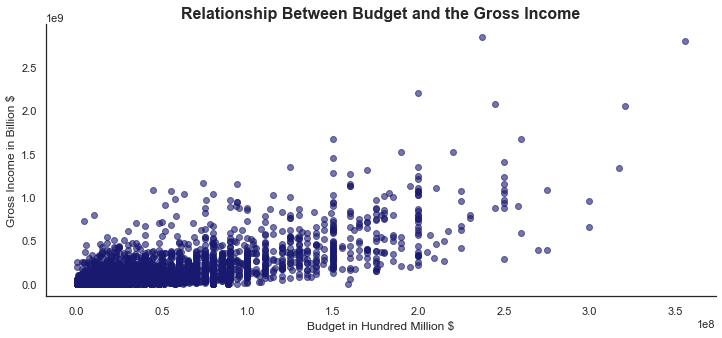

In [116]:
# Let's check the relationship between both columns expressed on a visual way
sns.set_style('white')
plt.figure(figsize = (12,5))
plt.scatter(df_movies_cleaned['budget'], df_movies_cleaned['gross'], alpha = 0.6, color = 'midnightblue')
plt.xlabel('Budget in Hundred Million $', fontsize = 12)
plt.ylabel('Gross Income in Billion $', fontsize = 12)
plt.title('Relationship Between Budget and the Gross Income', fontsize = 16, weight = 'bold')
sns.despine()
plt.show()

There seems to be some kind of relationship between the budget of a film and the gross income it generates. However, it's not so clear to determine with just this chart. Let's draw a regression line over it

Text(0.5, 1.0, 'Regression Line for the Budget and the Gross Income')

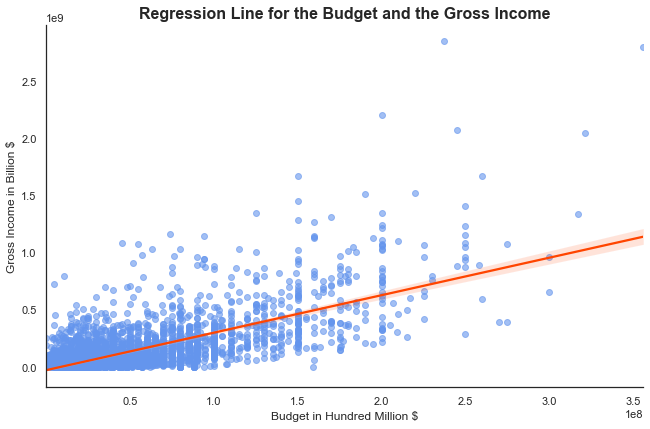

In [117]:
sns.set_style('white')
sns.lmplot(x = 'budget', y = 'gross', data = df_movies_cleaned,
          height=6, aspect=1.5, scatter_kws={'color':'cornflowerblue', 'alpha':0.6}, line_kws={'color': 'orangered'})
plt.xlabel('Budget in Hundred Million $', fontsize = 12)
plt.ylabel('Gross Income in Billion $', fontsize = 12)
plt.title('Regression Line for the Budget and the Gross Income', fontsize = 16, weight = 'bold')

Now that I see the regression line drawn, I can see with more clarity that there is a correlation between these 2 variables. Now I want to see how much of a correlation there is

In [118]:
# Let's check the correlation coeficient between both columns
df_movies_cleaned['gross'].corr(df_movies_cleaned['budget'])

0.726650160918627

There's in fact a high correlation between the budget and the gross income of a movie

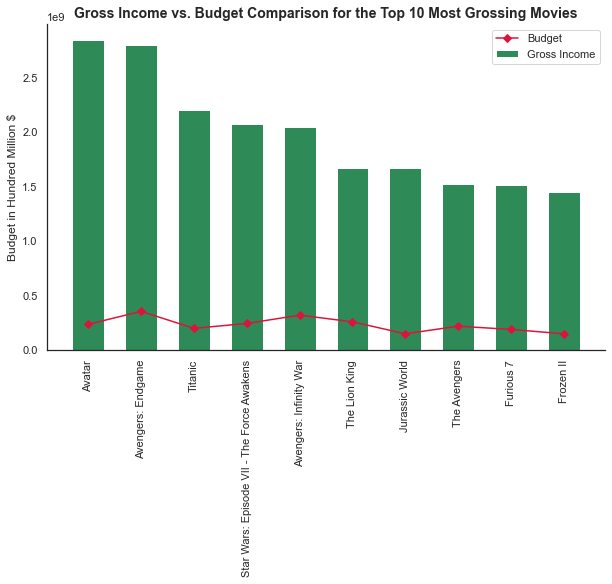

In [119]:
# Now I want to check how the top 10 grossing movies behaved regarding these 2 columns
plt.figure(figsize = (10,6))
plt.bar(np.arange(len(df_movies_cleaned.sort_values('gross', axis = 0, ascending = False).head(10)['name'])),
       df_movies_cleaned.sort_values('gross', axis = 0, ascending = False).head(10)['gross'], width = 0.6,
        label = 'Gross Income', color = 'seagreen')

plt.plot(np.arange(len(df_movies_cleaned.sort_values('gross', axis = 0, ascending = False).head(10)['name'])),
       df_movies_cleaned.sort_values('gross', axis = 0, ascending = False).head(10)['budget'],
       color = 'crimson', label = 'Budget', marker = 'D')

plt.xticks(ticks = np.arange(len(df_movies_cleaned.sort_values('gross', axis = 0, ascending = False).head(10)['name'])),
          labels = df_movies_cleaned.sort_values('gross', axis = 0, ascending = False).head(10)['name'],
           rotation = 90)
plt.ylabel('Budget in Hundred Million $')
plt.legend()
plt.title('Gross Income vs. Budget Comparison for the Top 10 Most Grossing Movies', fontsize = 14, weight = 'bold')
sns.despine()
plt.show()

As can be seen, although there is a high correlation between the gross income and the budget of a movie, budget alone doesn't explain the variations of the gross income. A clear example is Avatar, which grossed more money than Avengers: Endgame despite the fact that it costed less money to make

### Checking the relationship between  gross income and the rest of the numerical data

<AxesSubplot:>

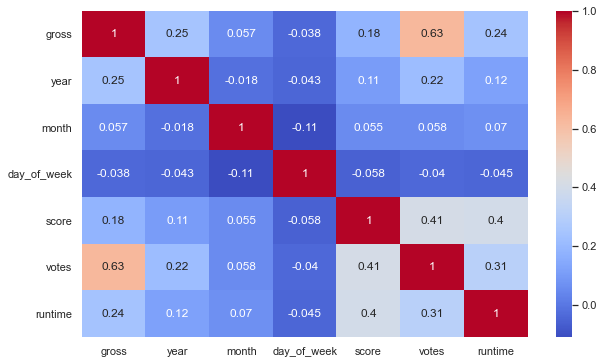

In [120]:
plt.figure(figsize = (10,6))
sns.heatmap(df_movies_cleaned[['gross', 'year', 'month', 'day_of_week', 'score', 'votes', 'runtime']].corr(),
            annot = True, cmap = 'coolwarm')

As I can see, there's pretty much no correlation with any of the other numerical variables except with 'votes'. Just so it's clear, votes refers to the number of reviews each movie got in order to get a score.

### Checking the relationship between votes and gross income

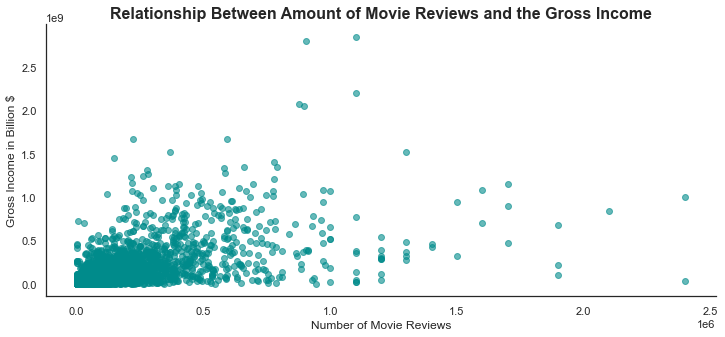

In [121]:
# Let's check the relationship between both columns expressed on a visual way
sns.set_style('white')
plt.figure(figsize = (12,5))
plt.scatter(df_movies_cleaned['votes'], df_movies_cleaned['gross'], alpha = 0.6, color = 'darkcyan')
plt.xlabel('Number of Movie Reviews', fontsize = 12)
plt.ylabel('Gross Income in Billion $', fontsize = 12)
plt.title('Relationship Between Amount of Movie Reviews and the Gross Income', fontsize = 16, weight = 'bold')
sns.despine()
plt.show()

Text(0.5, 1.0, 'Regression Line for the Number of Movie Reviews and the Gross Income')

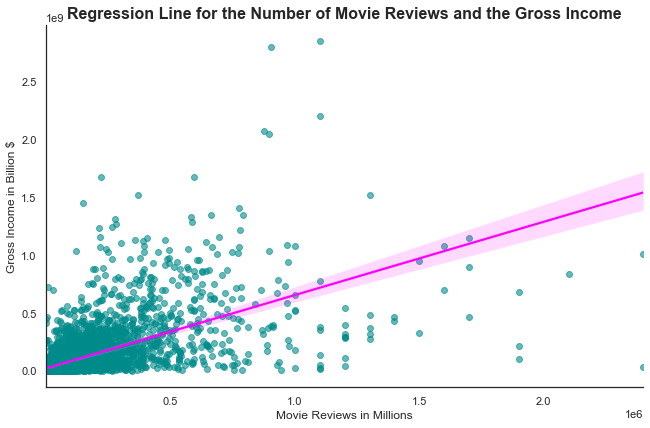

In [122]:
# Now let's watch this relationship be displayed in a reggression plot
sns.set_style('white')
sns.lmplot(x = 'votes', y = 'gross', data = df_movies_cleaned,
          height=6, aspect=1.5, scatter_kws={'color':'darkcyan', 'alpha':0.6}, line_kws={'color': 'magenta'})
plt.xlabel('Movie Reviews in Millions', fontsize = 12)
plt.ylabel('Gross Income in Billion $', fontsize = 12)
plt.title('Regression Line for the Number of Movie Reviews and the Gross Income', fontsize = 16, weight = 'bold')

As seen in the charts, there is some positive correlation between the amount of reviews a movie gets and the income it generates

### Checking the relationship between gross income and the categorical data

In [123]:
# I'll create a new temporal dataframe and change the string columns to categories
df_num = df_movies_cleaned

In [124]:
# With the new dataframe I'll change the strings to a number code automatelly generated by python
for colname in df_num.columns:
    if (df_num[colname].dtype == 'object'):
        df_num[colname] = df_num[colname].astype('category')
        df_num[colname] = df_num[colname].cat.codes

df_num

,name,rating,genre,year,month,day_of_week,date_of_release,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6582,3,6,1980,6,4,16,8.40,927000,2586,4011,1046,54,19000000,46998772,2320,146
1,5569,3,1,1980,7,2,20,5.80,65000,2266,1630,326,55,4500000,58853106,730,104
2,5138,1,0,1980,6,4,17,8.70,1200000,1110,2565,1744,55,18000000,538375067,1538,124
3,285,1,4,1980,7,2,20,7.70,221000,1299,1998,2243,55,3500000,83453539,1810,88
4,1025,3,4,1980,7,4,24,7.30,108000,1053,520,409,55,6000000,39846344,1775,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,3701,0,6,2020,10,4,2927,3.10,18,1498,2287,2418,55,7000,8896139,856,90
7659,1675,0,4,2020,2,4,2910,4.70,36,773,2612,1883,55,2690985,5675482,537,90
7660,4713,0,6,2020,4,0,2917,5.70,29,2058,2681,2037,55,58750,8896139,940,110
7661,2840,0,6,2020,10,3,2926,6.88,27705,1183,1822,449,55,15000,8896139,1946,120


<AxesSubplot:>

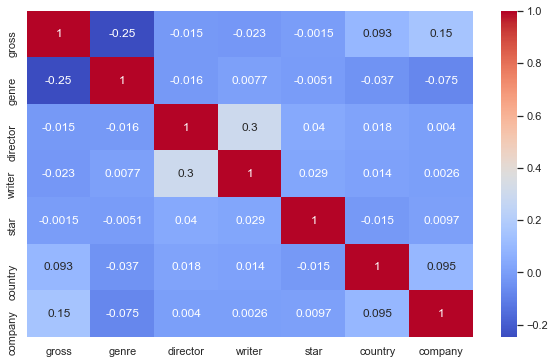

In [125]:
# Now I'll check the correlation between these new categorical data and the gross income
plt.figure(figsize = (10,6))
sns.heatmap(df_num[['gross' ,'genre', 'director', 'writer', 'star', 'country', 'company']].corr(),
            annot = True, cmap = 'coolwarm')

As seen, there is no strong correlation between the gross income and the rest of the variables

### Checking the relationship between budget and the rest of the variables

<AxesSubplot:>

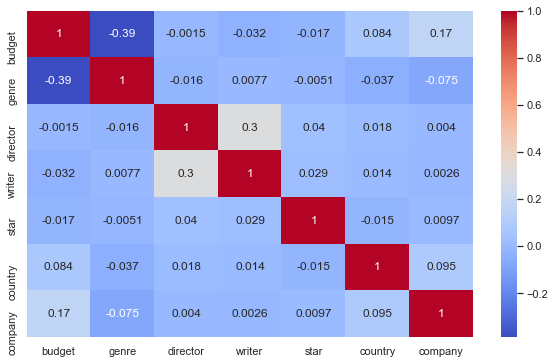

In [126]:
plt.figure(figsize = (10,6))
sns.heatmap(df_num[['budget' ,'genre', 'director', 'writer', 'star', 'country', 'company']].corr(),
            annot = True, cmap = 'coolwarm')

By seing this chart I can tell that there's no relationship between the budget and the rest of the categorical data

In [127]:
# Now I want to check the relationship among the different numerical variables
df_movies_cleaned = df_movies

<AxesSubplot:>

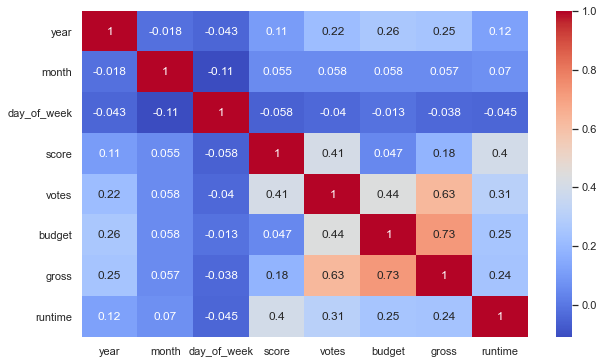

In [128]:
plt.figure(figsize = (10,6))
sns.heatmap(df_movies_cleaned.corr(),
            annot = True, cmap = 'coolwarm')

The same happens with the numercial data, budget has no relationship with it.

### Exploratory Analysis of the data

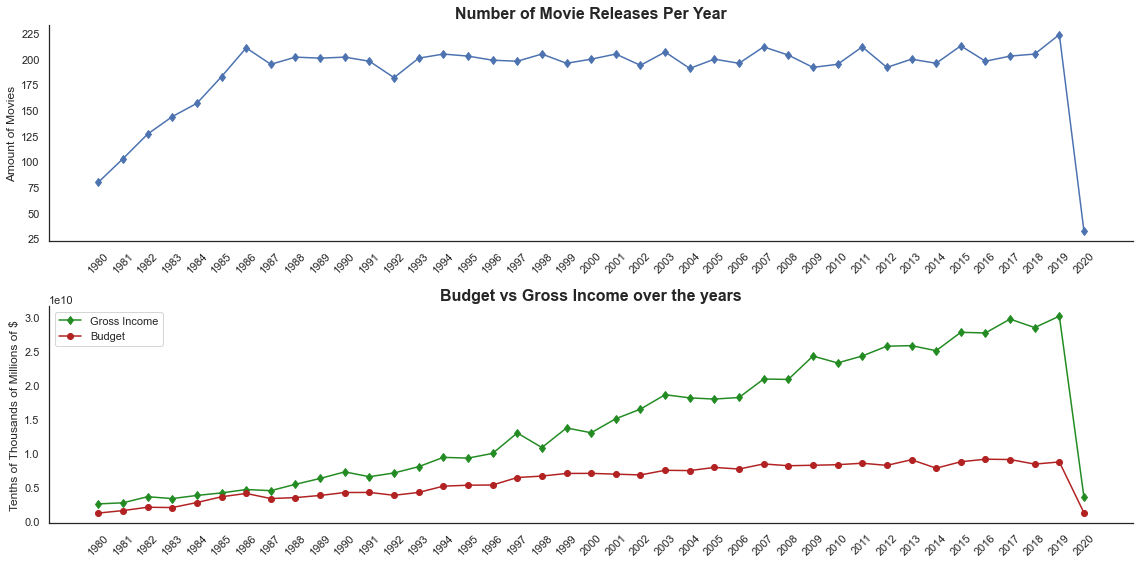

In [129]:
# I want to check how the amount of movie releases changed over the years, as well as the budget and gross income behavior
fig,ax = plt.subplots(2,1, figsize = (16,8))
ax[0].plot(df_movies_cleaned.groupby('year').size().index,df_movies_cleaned.groupby('year').size(), 
         marker = 'd')
ax[0].set_xticks(df_movies_cleaned.groupby('year').size().index)
ax[0].set_xticklabels(df_movies_cleaned.groupby('year').size().index, rotation = 45)
ax[0].set_title('Number of Movie Releases Per Year', size = 16, weight = 'bold')
ax[0].set_ylabel('Amount of Movies', size = 12)

ax[1].plot(df_movies_cleaned.groupby('year')['gross'].sum().index,df_movies_cleaned.groupby('year')['gross'].sum(), 
         marker = 'd', color = 'forestgreen', label = 'Gross Income')
ax[1].plot(df_movies_cleaned.groupby('year')['budget'].sum().index,df_movies_cleaned.groupby('year')['budget'].sum(), 
         marker = 'o', color = 'firebrick', label = 'Budget')
ax[1].set_xticks(df_movies_cleaned.groupby('year')['budget'].sum().index)
ax[1].set_xticklabels(df_movies_cleaned.groupby('year')['budget'].sum().index, rotation = 45)
ax[1].set_title('Budget vs Gross Income over the years', size = 16, weight = 'bold')
ax[1].set_ylabel('Tenths of Thousands of Millions of $', size = 12)
ax[1].legend()

plt.tight_layout()
sns.despine()
plt.show()

The insight that I get from these visuals is that despite the fact that the amount of movies produced has remained pretty much the same since 1985, the gross income as an industry has skyrocketed since the 90's; while the budget has stayed relatively the same over the years since the 2000's

#### Director variable - Exploratory Analysis

In [130]:
# First I'll create a table with the data that I want to do an exploratory analysis on
df_directors = df_movies_cleaned.pivot_table(index = 'director',
                                             values = ['name', 'budget','gross','runtime'],
                                             aggfunc = {'name':'count','budget':'sum','gross':'sum','runtime':'mean'})
# Changing the labels of the columns
df_directors.columns = ['total_budget', 'total_gross', 'total_movies', 'avg_runtime']

# Adding a new column with the total runtime for all the movies of each director 
df_directors['total_runtime'] = df_movies_cleaned.pivot_table(index = 'director',values = 'runtime', aggfunc = 'sum').iloc[:,0]
df_directors.head()

,total_budget,total_gross,total_movies,avg_runtime,total_runtime
director,,,,,
A.R. Murugadoss,22248021,38316584,1,186.00,186
Aamir Khan,20674146,21897373,1,165.00,165
Aaron Blaise,128000000,250397798,1,85.00,85
Aaron Norris,175581985,41169421,6,98.83,593
Aaron Seltzer,20000000,85749034,1,83.00,83


In [131]:
# Creating two new columns from the existing ones for the director's table. Both will work as KPIs
df_directors['gross_budget_ratio'] = df_directors['total_gross'] / df_directors['total_budget']# If <1: Not a profitable director
df_directors['cost_per_min'] = df_directors['total_budget'] / df_directors['total_runtime']

#Now I'll drop the total_runtime column
df_directors.drop('total_runtime',axis = 1, inplace = True)
df_directors

,total_budget,total_gross,total_movies,avg_runtime,gross_budget_ratio,cost_per_min
director,,,,,,
A.R. Murugadoss,22248021,38316584,1,186.00,1.72,119613.02
Aamir Khan,20674146,21897373,1,165.00,1.06,125297.85
Aaron Blaise,128000000,250397798,1,85.00,1.96,1505882.35
Aaron Norris,175581985,41169421,6,98.83,0.23,296091.04
Aaron Seltzer,20000000,85749034,1,83.00,4.29,240963.86
...,...,...,...,...,...,...
Álex de la Iglesia,35413621,66755810,1,99.00,1.89,357713.34
Édouard Molinaro,41372868,14839819,2,98.00,0.36,211086.06
Élie Chouraqui,43413621,3553242,2,106.50,0.08,203819.82


In [132]:
# I want to check the top 10 directors whose movies have not made a profit and who worked in more than one movie
df_directors[(df_directors['gross_budget_ratio'] <= 1) & 
            (df_directors['total_movies'] > 1)][['gross_budget_ratio','total_movies']].sort_values('total_movies'
    ,ascending=False).head(10)

,gross_budget_ratio,total_movies
director,,
Sidney Lumet,0.71,17
Robert Altman,0.97,14
John Carpenter,0.97,14
James Ivory,0.48,13
Blake Edwards,0.76,13
Paul Schrader,0.34,12
William Friedkin,0.86,11
Lars von Trier,0.88,11
Fred Schepisi,0.71,11


The above table displays the directors who worked in various projects but whose movies didn't made a profit. Should not be hired for commercial purposes

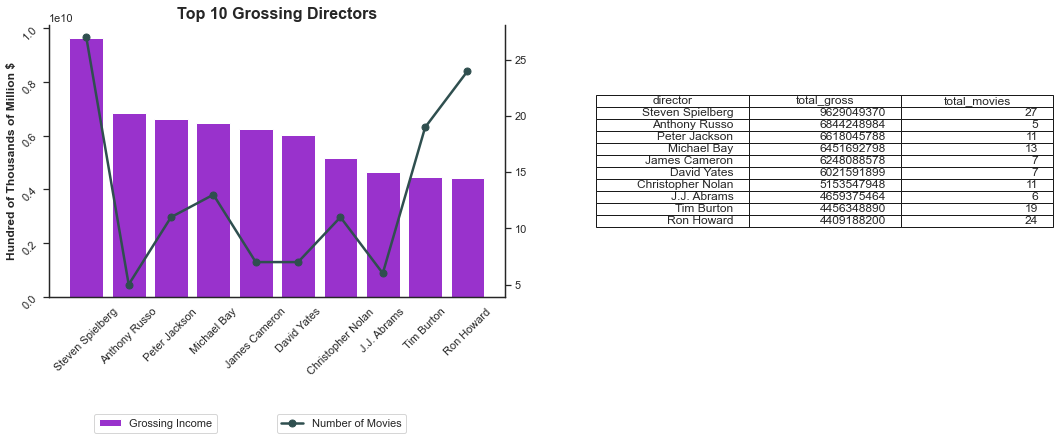

In [140]:
# Now I want to see the top 10 grossing directors, as well as how many movies they made to get to that amount

fig,ax = plt.subplots(1,2,figsize = (18,5))

ax[0].bar(x=df_directors.sort_values('total_gross',ascending=False).head(10).index,
       height=df_directors.sort_values('total_gross',ascending=False)['total_gross'].head(10),
       color = 'darkorchid',label = 'Grossing Income')
ax[0].tick_params(rotation = 45)
ax[0].set_title('Top 10 Grossing Directors', fontsize = 16, weight = 'bold')
ax[0].set_ylabel('Hundred of Thousands of Million $',weight = 'bold')

ax1 = ax[0].twinx()
ax1.plot(df_directors.sort_values('total_gross',ascending=False).head(10).index,
         df_directors.sort_values('total_gross',ascending=False)['total_movies'].head(10),
        color = 'darkslategrey', lw = 2.5, marker = 'o', markersize = 7, label = 'Number of Movies')
ax[0].legend(loc = (0.1,-0.5))
ax1.legend(loc = (0.5,-0.5))

ax[1].table(cellText = np.hstack((df_directors.sort_values('total_gross',ascending=False)[['total_gross','total_movies']].head(10).index.values.reshape((10,1)),df_directors.sort_values('total_gross',ascending=False)[['total_gross','total_movies']].head(10).values)),
           colLabels = ['director','total_gross','total_movies'], loc = 'center')
ax[1].axis('off')

sns.despine(right = False)
plt.show()


The above chart shows that these directors can make a movie that will draw people to the theaters. However, a couple of these only made few movies to get there, so it would be better to dive deeper into the first director and see his track record

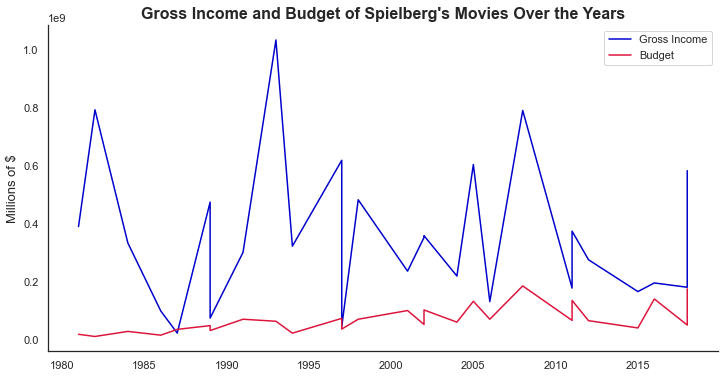

In [140]:
# Let's start with Spielberg. Since he's the director with more movies, let's see how they have performed over the years
fig,ax = plt.subplots(figsize = (12,6))

ax.plot(df_movies_cleaned[df_movies_cleaned['director'] == 'Steven Spielberg']['year'],
        df_movies_cleaned[df_movies_cleaned['director'] == 'Steven Spielberg']['gross'], color = 'mediumblue',
       label = 'Gross Income')
ax.set_ylabel('Millions of $', fontsize = 13)
ax.set_title("Gross Income and Budget of Spielberg's Movies Over the Years", weight = 'bold', fontsize= 16)

ax.plot(df_movies_cleaned[df_movies_cleaned['director'] == 'Steven Spielberg']['year'],
        df_movies_cleaned[df_movies_cleaned['director'] == 'Steven Spielberg']['budget'], color = 'crimson',
       label = 'Budget')
ax.legend()
ax.axis()
sns.despine()
plt.show()

The chart shows that Spielberg's movies have had financial success in most of the cases, and on average his movies are very profitable

In [141]:
# Now I want to see the average lenght of a Spielberg movie
avg_spielberg_movie = df_movies_cleaned[df_movies_cleaned['director'] == 'Steven Spielberg']['runtime'].mean()
avg_spielberg_movie

137.07407407407408

In [142]:
# Now I want to know the cost per minute of a Spielberg movie
min_cost_spielberg = df_directors.loc['Steven Spielberg','cost_per_min']
min_cost_spielberg

511078.08700351254

In [143]:
# Finally I want to see how much money an average Spielberg movie would cost
print('An average movie directed by Spielberg would cost around ${}'.format(avg_spielberg_movie*min_cost_spielberg))

An average movie directed by Spielberg would cost around $70055555.55555555


In [145]:
# Now I want to check the top 10 most profitable directors who are not one-hit wonders and have worked in at least 5 movies
df_directors[(df_directors['gross_budget_ratio'] > 1) & 
            (df_directors['total_movies'] >= 5)][['gross_budget_ratio','total_movies']].sort_values('gross_budget_ratio'
    ,ascending=False).head(10)

,gross_budget_ratio,total_movies
director,,
James Cameron,8.34,7
James Wan,8.11,9
Hayao Miyazaki,7.18,7
Todd Phillips,6.63,9
Jake Kasdan,6.52,7
Carlos Saldanha,5.98,5
Anthony Russo,5.95,5
Bill Condon,5.73,10
Emile Ardolino,5.53,5


These directors have a track record of delivering movies that always make a profit

#### Genre variable - Exploratory Analysis

In [152]:
# First I'll create a table similar to the one used for the directors analysis
df_genres = df_movies_cleaned.pivot_table(index = 'genre', values = ['name', 'gross', 'budget','runtime'],
                             aggfunc = {'name':'count','gross':'sum',
                                        'budget':'sum','runtime':'mean'}).sort_values('name', ascending=False)
df_genres.columns = ['total_budget','total_gross','total_movies','avg_runtime']
df_genres

,total_budget,total_gross,total_movies,avg_runtime
genre,,,,
Comedy,49068325085,99214927698,2245,101.49
Action,94241243326,246498486886,1705,110.20
Drama,31937471341,58286452051,1518,112.98
Crime,11788120518,21636109903,551,111.71
Biography,10998927464,21046419999,443,119.88
Adventure,19216746071,46405634558,427,107.98
Animation,24127424218,80303426025,338,92.20
Horror,4053578143,15157885393,322,96.30
Fantasy,750341071,1699022201,44,99.36


In [158]:
df_genres['total_runtime'] = df_movies_cleaned.pivot_table(index = 'genre', 
                              values = ['name','runtime'],
                              aggfunc={'name':'count','runtime':'sum'}).sort_values('name', ascending=False)['runtime']
df_genres

,total_budget,total_gross,total_movies,avg_runtime,total_runtime
genre,,,,,
Comedy,49068325085,99214927698,2245,101.49,227849
Action,94241243326,246498486886,1705,110.20,187891
Drama,31937471341,58286452051,1518,112.98,171505
Crime,11788120518,21636109903,551,111.71,61554
Biography,10998927464,21046419999,443,119.88,53107
Adventure,19216746071,46405634558,427,107.98,46107
Animation,24127424218,80303426025,338,92.20,31165
Horror,4053578143,15157885393,322,96.30,31010
Fantasy,750341071,1699022201,44,99.36,4372


In [159]:
df_genres['gross_budget_ratio'] = df_genres['total_gross'] / df_genres['total_budget']
df_genres['cost_per_min'] = df_genres['total_budget'] / df_genres['total_runtime']
df_genres

,total_budget,total_gross,total_movies,avg_runtime,total_runtime,gross_budget_ratio,cost_per_min
genre,,,,,,,
Comedy,49068325085,99214927698,2245,101.49,227849,2.02,215354.58
Action,94241243326,246498486886,1705,110.20,187891,2.62,501574.02
Drama,31937471341,58286452051,1518,112.98,171505,1.83,186218.89
Crime,11788120518,21636109903,551,111.71,61554,1.84,191508.60
Biography,10998927464,21046419999,443,119.88,53107,1.91,207108.81
Adventure,19216746071,46405634558,427,107.98,46107,2.41,416785.87
Animation,24127424218,80303426025,338,92.20,31165,3.33,774183.35
Horror,4053578143,15157885393,322,96.30,31010,3.74,130718.42
Fantasy,750341071,1699022201,44,99.36,4372,2.26,171624.22


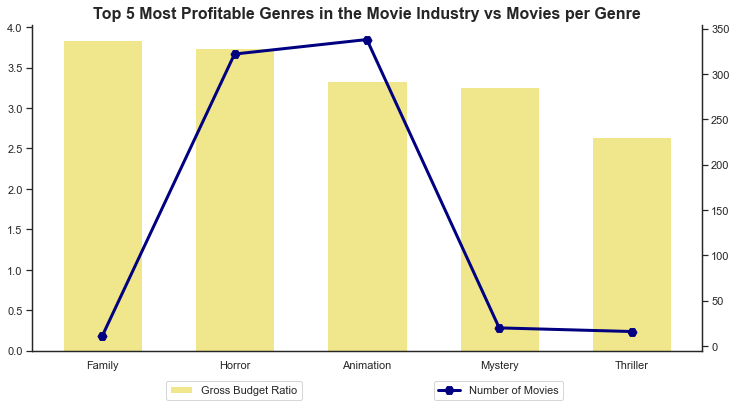

In [191]:
# Now that I have this table, I want to know the 5 most profitable genres, as well as the number of movies per genre
fig,ax = plt.subplots(figsize= (12,6))
ax.bar(df_genres.sort_values('gross_budget_ratio', ascending=False).head(5).index,
       df_genres.sort_values('gross_budget_ratio', ascending=False).head(5)['gross_budget_ratio'],
       width= 0.6, color = 'khaki', label = 'Gross Budget Ratio')
ax.set_title('Top 5 Most Profitable Genres in the Movie Industry vs Movies per Genre', fontdict={'size':16, 'weight':'bold'})

ax1 = ax.twinx()
ax1.plot(df_genres.sort_values('gross_budget_ratio', ascending=False).head(5).index,
        df_genres.sort_values('gross_budget_ratio', ascending=False).head(5)['total_movies'],
        label = 'Number of Movies', lw = 3, marker = 'H',markersize = 9, color = 'navy')
ax.legend(loc = (0.2,-0.15))
ax1.legend(loc = (0.6,-0.15))
sns.despine(right = False)

As the chart shows, the Horror genre is the most profitable genre in the Movies Industry with the largest amount of movies produced. It would be worth it to look into the details of this genre

In [202]:
# I'd like to see, on average, how much does it cost to produce a Horror Movie, and how much it would earn
horror_movie_budget = df_genres.loc['Horror','cost_per_min'] * df_genres.loc['Horror','avg_runtime']
print ("On average a horror movie's budget is ${}".format(horror_movie_budget))
print('According to its gross-budget ratio, which is {}, the gross income of the movie would be ${}'.format(df_genres.loc['Horror','gross_budget_ratio'],horror_movie_budget * df_genres.loc['Horror','gross_budget_ratio']))

On average a horror movie's budget is $12588751.996894408
According to its gross-budget ratio, which is 3.7393840351087566, the gross income of the movie would be $47074178.23913043


In [208]:
# Now I want to see how horrors movies are released throughout the year
np.sort(df_movies_cleaned['month'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

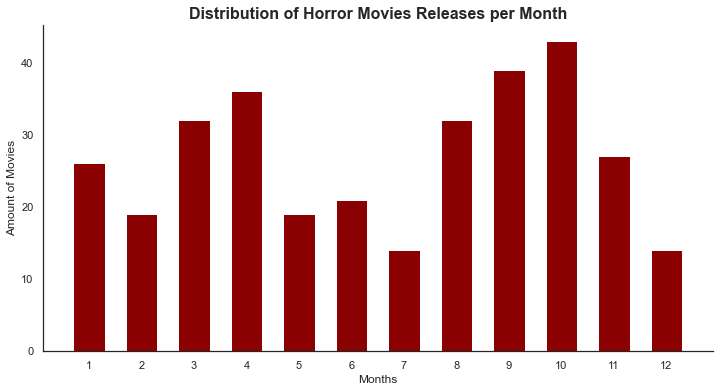

In [222]:
fig,ax = plt.subplots(figsize= (12,6))
ax.bar(df_movies_cleaned[df_movies_cleaned['genre'] == 'Horror'].groupby('month')['name'].size().index,
       df_movies_cleaned[df_movies_cleaned['genre'] == 'Horror'].groupby('month')['name'].size(),
       width= 0.6, color = 'darkred', label = 'Number of Movies')
ax.set_xticks(df_movies_cleaned[df_movies_cleaned['genre'] == 'Horror'].groupby('month')['name'].size().index)
ax.set_xticklabels(df_movies_cleaned[df_movies_cleaned['genre'] == 'Horror'].groupby('month')['name'].size().index)
ax.set_title('Distribution of Horror Movies Releases per Month', fontdict={'size':16, 'weight':'bold'})
ax.set_ylabel('Amount of Movies')
ax.set_xlabel('Months')

sns.despine()
plt.show()
#df_movies_cleaned[df_movies_cleaned['genre'] == 'Horror'].groupby('month')['name'].size()

Per the above chart, by far the month when most horror movies are released is October, followed by September. This makes sense since october is Halloween and people look for scary movies during that month

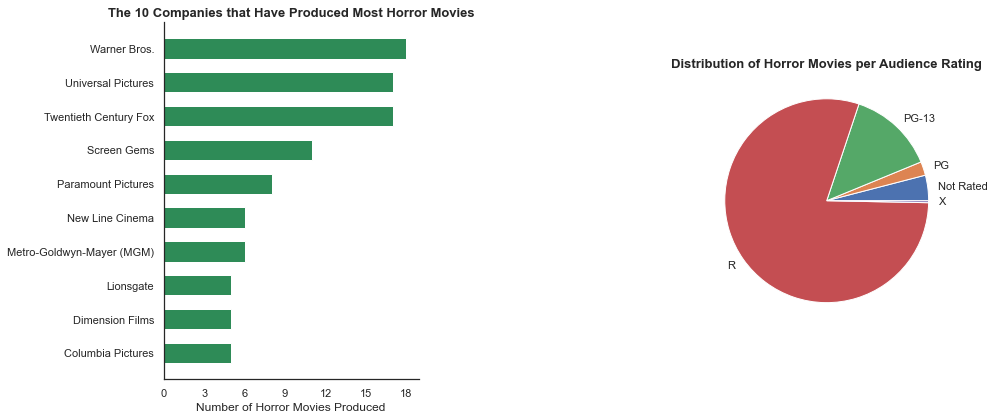

In [260]:
# Now, I'd like to know the companies that have produced most Horror movies, as well as the genres they belong to
comp_horror = df_movies_cleaned[df_movies_cleaned['genre'] == 'Horror'].groupby('company')['name'].size().sort_values(ascending = False)

fig, ax = plt.subplots(1,3,figsize = (14,6))

ax[0].barh(comp_horror.head(10).index.sort_values(),
           comp_horror.head(10).sort_values(), height = 0.6, color = 'seagreen')
ax[0].set_xticks(np.arange(0,19,3))
ax[0].set_xlabel('Number of Horror Movies Produced',fontsize = 12)
ax[0].set_title('The 10 Companies that Have Produced Most Horror Movies',fontsize = 13, weight = 'bold')

ax[1].axis('off')

ax[2].pie(df_movies_cleaned[df_movies_cleaned['genre'] == 'Horror'].groupby('rating')['name'].size(),
         labels = df_movies_cleaned[df_movies_cleaned['genre'] == 'Horror'].groupby('rating')['name'].size().index)
ax[2].set_title('Distribution of Horror Movies per Audience Rating', fontsize = 13, weight = 'bold')

plt.tight_layout()
sns.despine(ax=ax[1],left = True, bottom = True)
sns.despine(ax=ax[0])
plt.show()

As can be seen in the previous charts, Warner Bros, Universal Pictures and Twentieth Century Fox have produced most the horror films to date. Almost all of the horror movies made, have been rated R adn then PG-13. So basically, if a filmaker wants to make a horror movie, it should be aimed to an adult audience and try to make it produced by any of the companies in the chart, since they have experience working with those types of films.